<a href="https://colab.research.google.com/github/suryavanshi18/Python/blob/main/NN_Sratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhi97","key":"bcecae12ff7902c339c7b1a9de5ce1ce"}'}

In [4]:
!pip install -U -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c digit-recognizer

 98% 15.0M/15.3M [00:01<00:00, 21.3MB/s]
100% 15.3M/15.3M [00:01<00:00, 12.3MB/s]


In [7]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [87]:
data=pd.read_csv('train.csv')

In [88]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
data.shape

(42000, 785)

In [11]:
data.iloc[2,3]#Column,row

0

In [12]:
type(data)

pandas.core.frame.DataFrame

In [13]:
data['pixel0'][41999]

0

In [90]:
data=np.array(data)

In [91]:
data.shape

(42000, 785)

In [92]:
rows,cols=data.shape
print(rows)
print(cols)

42000
785


In [17]:
data[41990:].shape

(10, 785)

In [18]:
data[0].shape

(785,)

In [93]:
np.random.shuffle(data)

In [94]:
data_dev=data[:2000]

In [110]:
y_dev=data_dev[:,0].T
x_dev=data_dev[:,1:].T/255

In [96]:
x_dev[0].shape

(2000,)

In [97]:
x_dev.shape

(784, 2000)

In [111]:
data_train=data[2000:]
y_train=data_train[:,0].T
x_train=data_train[:,1:].T/255

In [99]:
x_train.shape

(784, 40000)

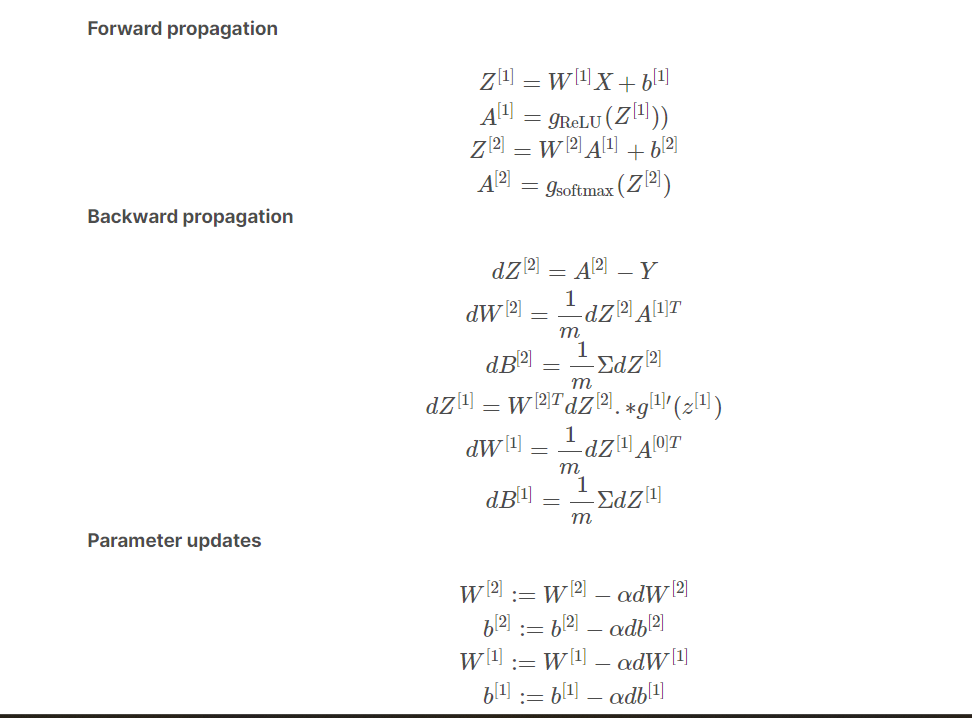

In [117]:
#Only 2 layes in network
def init_params():
  w1=np.random.rand(10,784)-0.5
  b1=np.random.rand(10,1)-0.5
  w2=np.random.rand(10,10)-0.5
  b2=np.random.rand(10,1)-0.5
  return w1,b1,w2,b2

In [118]:
def ReLu(x):
  return np.maximum(x,0)
def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A
def forward_prop(w1,b1,w2,b2,X):
  z1=w1.dot(X)+b1
  a1=ReLu(z1)
  z2=w2.dot(a1)+b2
  a2=softmax(z2)
  return z1,a1,z2,a2
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y
def deriv_relu(Z):
  return Z>0
def back_prop(z1,a1,z2,a2,w1,w2,X,Y):
  m=Y.size
  encoded_y=one_hot(Y)
  dz2=a2-encoded_y
  dw2=1/m*dz2.dot(a1.T)
  db2=1/m*np.sum(dz2)
  dz1=w2.T.dot(dz2)*deriv_relu(z1)
  dw1=1/m*dz1.dot(X.T)
  db1=1/m*np.sum(dz1)
  return dw1,db1,dw2,db2
def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
  w1=w1-alpha*dw1
  w2=w2-alpha*dw2
  b1=b1-alpha*db1
  b2=b2-alpha*db2
  return w1,b1,w2,b2

In [119]:
def get_accuracy(y_pred,y):
  return np.sum(y_pred==y)/y.size
def get_predictions(A2):
  return np.argmax(A2,0)

In [120]:
def gradient_descent(X,Y,iterations,alpha):
  w1,b1,w2,b2=init_params()
  for i in range(iterations):
    z1,a1,z2,a2=forward_prop(w1,b1,w2,b2,X)
    dw1,db1,dw2,db2=back_prop(z1,a1,z2,a2,w1,w2,X,Y)
    w1,b1,w2,b2=update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
    if(i%10==0):
      print('Iterations: ',i)
      print('Accuracy: ',get_accuracy(get_predictions(a2),Y))
  return w1,b1,w2,b2

In [121]:
w1,b1,w2,b2=gradient_descent(x_train,y_train,500,0.1)

Iterations:  0
Accuracy:  0.111925
Iterations:  10
Accuracy:  0.172675
Iterations:  20
Accuracy:  0.271725
Iterations:  30
Accuracy:  0.36645
Iterations:  40
Accuracy:  0.44635
Iterations:  50
Accuracy:  0.5046
Iterations:  60
Accuracy:  0.5469
Iterations:  70
Accuracy:  0.5814
Iterations:  80
Accuracy:  0.610675
Iterations:  90
Accuracy:  0.635825
Iterations:  100
Accuracy:  0.65735
Iterations:  110
Accuracy:  0.675775
Iterations:  120
Accuracy:  0.6907
Iterations:  130
Accuracy:  0.7052
Iterations:  140
Accuracy:  0.717925
Iterations:  150
Accuracy:  0.728225
Iterations:  160
Accuracy:  0.7378
Iterations:  170
Accuracy:  0.747125
Iterations:  180
Accuracy:  0.7547
Iterations:  190
Accuracy:  0.7618
Iterations:  200
Accuracy:  0.76845
Iterations:  210
Accuracy:  0.7743
Iterations:  220
Accuracy:  0.780575
Iterations:  230
Accuracy:  0.7853
Iterations:  240
Accuracy:  0.7902
Iterations:  250
Accuracy:  0.794175
Iterations:  260
Accuracy:  0.797975
Iterations:  270
Accuracy:  0.80175
It

In [122]:
def make_predictions(x,w1,b1,w2,b2):
  _,_,_,a2=forward_prop(w1,b1,w2,b2,x)
  return get_predictions(a2)
def test_prediction(index,w1,b1,w2,b2):
  curr_img=x_train[:,index,None]
  preds=make_predictions(curr_img,w1,b1,w2,b2)
  label=y_train[index]
  print("Prediction: ",preds)
  print("Label: ",label)
  curr_img=curr_img.reshape((28,28))*255
  plt.gray()
  plt.imshow(curr_img,interpolation='nearest')
  plt.show()

Prediction:  [8]
Label:  8


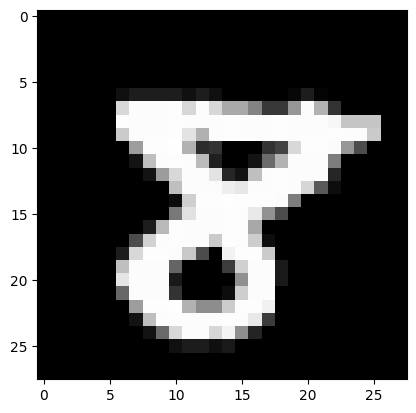

Prediction:  [7]
Label:  7


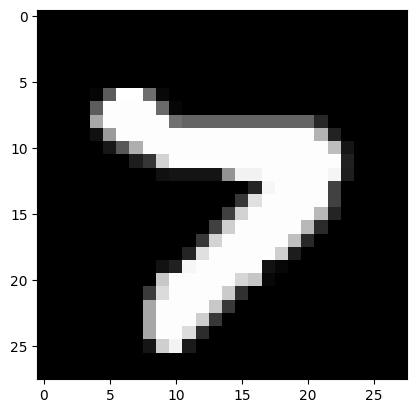

Prediction:  [3]
Label:  3


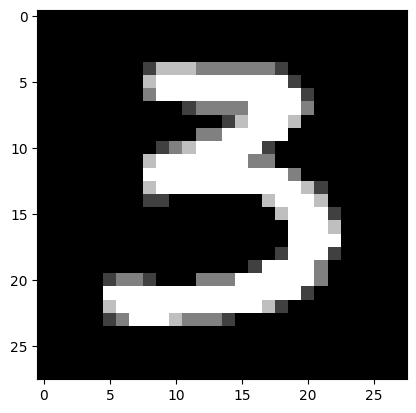

Prediction:  [6]
Label:  6


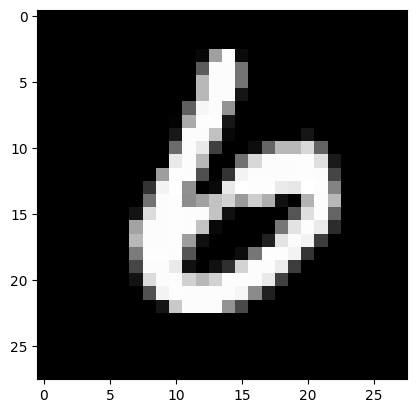

In [123]:
test_prediction(0,w1,b1,w2,b2)
test_prediction(1,w1,b1,w2,b2)
test_prediction(2,w1,b1,w2,b2)
test_prediction(3,w1,b1,w2,b2)

In [124]:
dev_predictions = make_predictions(x_dev, w1, b1, w2, b2)
print("Accuracy on test set:",get_accuracy(dev_predictions, y_dev)*100,"%")

Accuracy on test set: 84.35000000000001 %
